Name: Deniz Ekiz 
Number: 2016700051

I hereby declare that I observed the honour code of the university when preparing the homework.

## Solution to 16.3-5 and 18
### 16.3
In this data set, I see a timeseries like $y = z$ where, $z$ is a and y is a function from $\mathbb{R} \rightarrow \mathbb{R} $.
There is some points where there are some noises. Let's define noise with $u$

$y = z + u$

The interval of $z$ is $[0,25]$. 

$u = random(-25,25)$ with a probaility of $p_2$

$u = 0 $ with a probability of $1-p_2$

$z_{t + 1} = z_{t}$ with a probability of $p_1$

$z_{t + 1} = random(0,25)$ with a probability of $1-p_1$
### 16.4


<img src ="./files/16.4.jpg"/>
### 16.5
<img src ="./files/16.5.jpg"/>

### 18
#### 18.1  Draw the corresponding directed graphical model

<img src="files/18_directed.jpg"/>

#### 18.2 Draw an equivalent factor graph and undirected graphical model

##### Factor Graph

<img src ="files/factor_1.jpg"/>

##### Undirected Graphical Model

<img src ="files/18_undirected.jpg"/>

#### 18.3  If all the variables have $N$ states, compute the space to store the model specification.

$P(A) \rightarrow N-1$

$P(M) \rightarrow N-1$

$P(L|M) \rightarrow (N-1)^2$

$P(T|A) \rightarrow (N-1)^2$

$P(F|T,L) \rightarrow (N-1)^3$

$P(T|A) \rightarrow (N-1)^2$

$P(B|M) \rightarrow (N-1)^2$

$P(X|F) \rightarrow (N-1)^2$

$p(D|F,B)  \rightarrow (N-1)^3$

The summation equals to $3(N-1)^3 + 5(N-1)^2 + 2(N-1) $

#### 18.4  Verify the following conditional independence statements using d-separation. State if they are true or false and explain why.

a) A ⊥⊥ M|∅

True. Because there is no such connection between A and M given empty set.

b) A ⊥⊥ M|X

False, The variable F is a collider along the path A-T-F-X and M-L-F-X. Therefore, conditioning on X makes A and B depandent 

c) T ⊥⊥ L|X

False, F is a collider in the path T-F-X and L-F-X therefore, they are depandent.

d) X ⊥⊥ L|F

True, F is a collider on the oath L-F-X conditionin on F makes them independant

e) X ⊥⊥ L|D

False, D is not in the path of L-F-X. They are dependant.




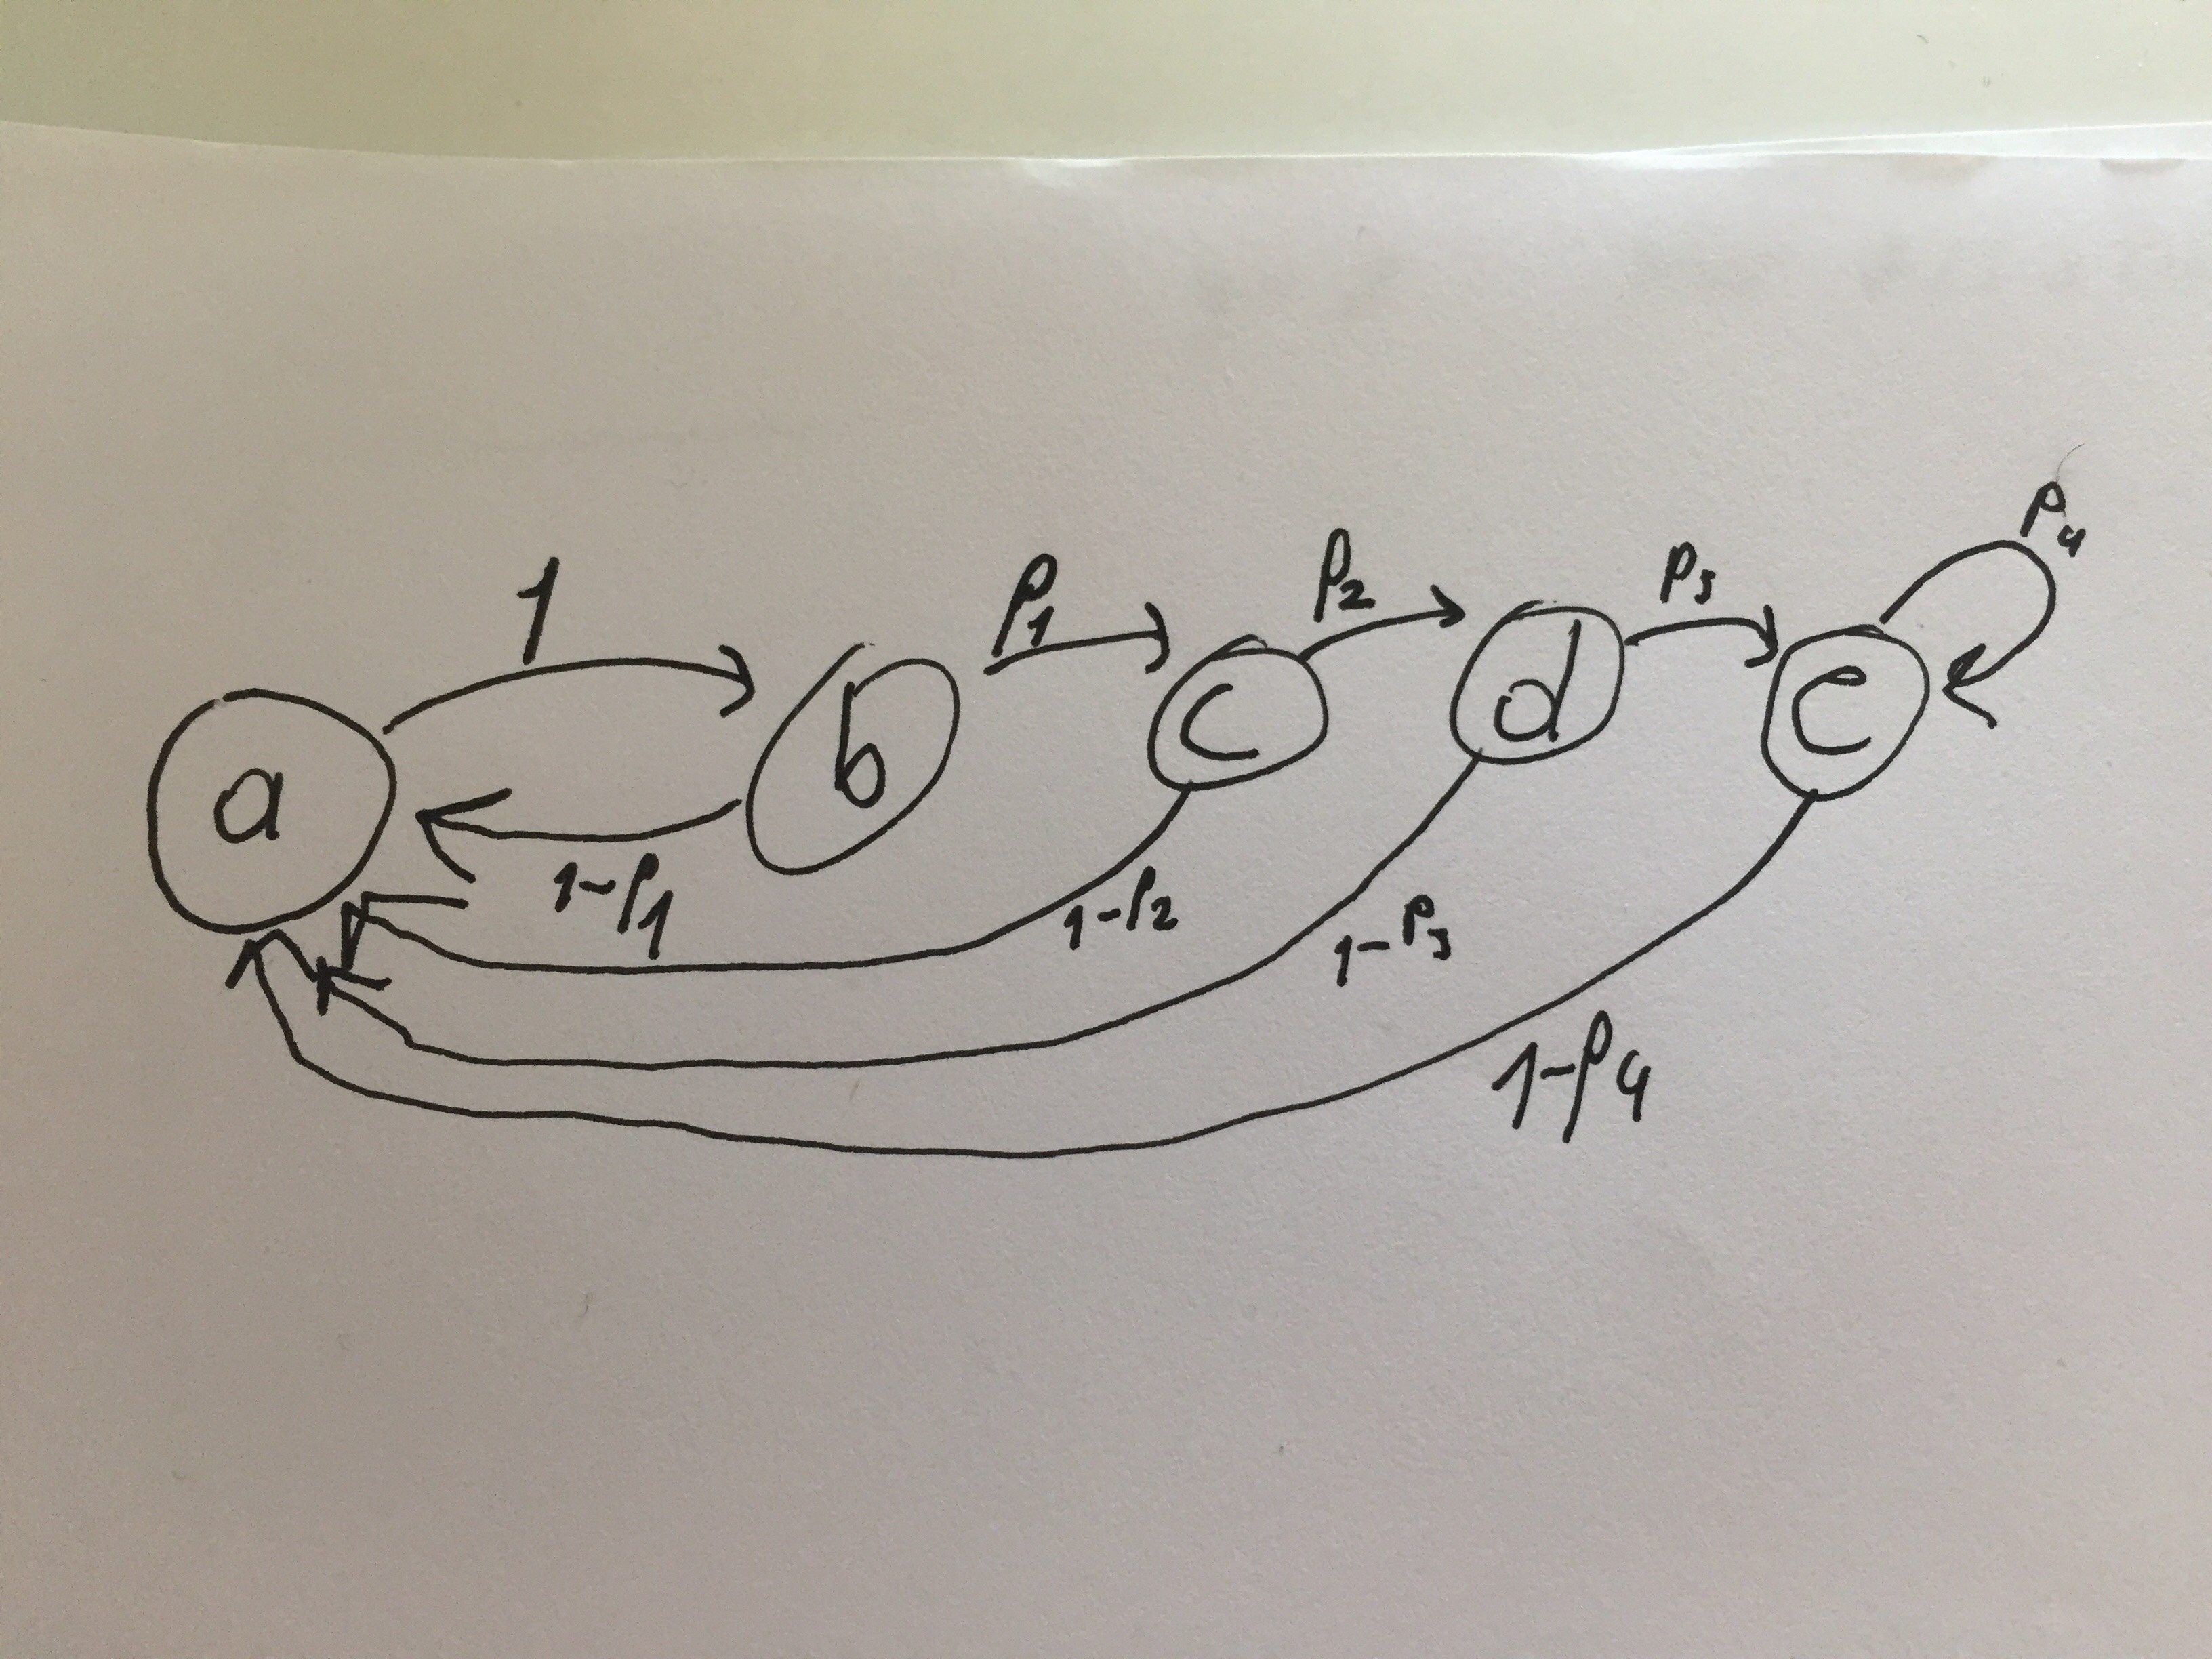

In [1]:
from IPython.display import Image
Image(filename='./files/16.4.jpg')

## Pr?gr?mm?ng?H?m?w?rk 3

In this exercise we model a string of text using a Markov(1) model. For simplicity we only consider letters 'a-z'. Capital letters 'A-Z' are mapped to the corresponding ones. All remaining letters, symbols, numbers, including spaces, are denoted by '.'.


We have a probability table $T$ where $T_{i,j} = p(x_t = j | x_{t-1} = i)$  transition model of letters in English text for $t=1,2 \dots N$. Assume that the initial letter in a string is always a space denoted as $x_0 = \text{'.'}$. Such a model where the probability table is always the same is sometimes called a stationary model.

1. For a given $N$, write a program to sample random strings with letters $x_1, x_2, \dots, x_N$ from $p(x_{1:N}|x_0)$
1. Now suppose you are given strings with missing letters, where each missing letter is denoted by a question mark (or underscore, as below). Implement a method, that samples missing letters conditioned on observed ones, i.e., samples from $p(x_{-\alpha}|x_{\alpha})$ where $\alpha$ denotes indices of observed letters. For example, if the input is 't??.', we have $N=4$ and
$x_1 = \text{'t'}$ and $x_4 = \text{'.'}$, $\alpha=\{1,4\}$ and $-\alpha=\{2,3\}$. Your program may possibly generate the strings 'the.', 'twi.', 'tee.', etc. Hint: make sure to make use all data given and sample from the correct distribution. Implement the method and print the results for the test strings below. 
1. Describe a method for filling in the gaps by estimating the most likely letter for each position. Hint: you need to compute
$$
x_{-\alpha}^* = \arg\max_{x_{-\alpha}} p(x_{-\alpha}|x_{\alpha})
$$
Implement the method and print the results for the following test strings along with the log-probability  $\log p(x_{-\alpha}^*,x_{\alpha})$.
1. Discuss how you can improve the model to get better estimations.

In [1]:
test_strings = ['th__br__n.f_x.', '_u_st__n_.to_be._nsw_r__','i__at_._a_h_n_._e_r_i_g','q___t.___z._____t.__.___.__.']

Hint: The code below loads a table of transition probabilities for English text.

In [2]:
import csv
import numpy as np
from IPython.display import display, Latex

alphabet = [chr(i+ord('a')) for i in range(26)]
alphabet.append('.')
letter2idx = {c:i for i,c in enumerate(alphabet)}

T = []
with open('transitions.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        T.append(row)

print('Example')
## p(x_t = 'u' | x_{t-1} = 'q')
display(Latex(r"$p(x_t = \text{'u'} | x_{t-1} = \text{'q'})$"))
print(T[letter2idx['q']][letter2idx['u']])
display(Latex(r"$p(x_t | x_{t-1} = \text{'a'})$"))
t = 0.0
for c,p in zip(alphabet,T[letter2idx['a']]):
    print(c,p)

Example


<IPython.core.display.Latex object>

0.9949749


<IPython.core.display.Latex object>

('a', '0.0002835')
('b', '0.0228302')
('c', '0.0369041')
('d', '0.0426290')
('e', '0.0012216')
('f', '0.0075739')
('g', '0.0171385')
('h', '0.0014659')
('i', '0.0372661')
('j', '0.0002353')
('k', '0.0110124')
('l', '0.0778259')
('m', '0.0260757')
('n', '0.2145354')
('o', '0.0005459')
('p', '0.0195213')
('q', '0.0001749')
('r', '0.1104770')
('s', '0.0934290')
('t', '0.1317960')
('u', '0.0098029')
('v', '0.0306574')
('w', '0.0088799')
('x', '0.0009562')
('y', '0.0233701')
('z', '0.0018701')
('.', '0.0715219')


In [4]:
#given N
#create CDF
sn = 10
selection = 26 #string index in alphabet
def string_generator(selection,sn):
    N = 27
    selected_strings = np.zeros([0,1])
    for z in range(0,sn):
        CDF = np.zeros((0,2))
        my_sum = 0.0
        prev_let = alphabet[selection]
        for i in range(0,N):
            #my_str = "$p(x_t = \text{'" + alphabet[i]+ "'} | x_{t-1} = \text{'.'}$ ) = "+ T[i][letter2idx[prev_let]] 
            #display( Latex(r"$p(x_t = \text{'" + alphabet[i]+ r"'} | x_{t-1} = \text{'"+prev_let+r"'}$ ) = "+ T[i][letter2idx[prev_let]] ))
            CDF = np.vstack((CDF,[alphabet[i],float(T[i][letter2idx[prev_let]]) ]))
            my_sum += float(T[i][letter2idx[prev_let]])
        #print(my_sum)
        # normalize and find CDF
        CDF[0,1] = float(CDF[0,1])/my_sum
        for i in range(1,N):
            if(len(CDF[:,1])>1):
                CDF[i,1] =  float(CDF[i,1])/my_sum  + float(CDF[i-1,1])
            else:
                CDF[0,1] = 1


        #print(CDF)
        s = np.random.uniform(0,1,1)
        for i in range(0,len(s)):
            for j in range(0,len(CDF[:,1])):
                if(s[i] <= float(CDF[j,1])):
                    selected_strings = np.vstack((selected_strings,CDF[j,0]))
                    selection = j
                    break
    #print("For N= "+ str(N) +" and Sample number= "+ str(sn) +" Selected strings:")
    return selected_strings

#### Part 1

In [5]:
N = 10
gens = string_generator(letter2idx['.'],N)
for i in range(0,len(gens)):
    print(str(gens[i,0])),


d a z a v a h t x e


### Part 2

In [6]:
for i in range(0,10):
    print(" ")
    gens = string_generator(letter2idx['t'],3)
    print('t'),
    for i in range(0,len(gens)):
        print(str(gens[i,0])),

 
t k c i  
t n a c  
t p p x  
t a v x  
t i x x  
t . y p  
t i l a  
t i h g  
t a x x  
t s i .


### Part 3

In [9]:
def find_empty_chars(st):
    i = 0
    z = 0
    my_index = []
    for c in st:
        if(c == '_'):
            my_index.append(z)
            i = i + 1
        z = z + 1
    return my_index

for j in range(0,len(test_strings)):
    a = find_empty_chars(test_strings[j])
    #print(a)
    for i in a:
        my_str = list(test_strings[j])
        if i == 0:
            #print(i)
            my_str[i] = alphabet[np.argmax(T[letter2idx['.']])]
        else:
            my_str[i] = alphabet[np.argmax(T[letter2idx[my_str[i-1]]])]
        test_strings[j] = "".join(my_str)
print(test_strings)       
    

['the.bre.n.f.x.', 'tursthen..tonbe.tnswhre.', 'in.ath.tanhen..te.reing', 'quret.thez.the.tt.th.the.th.']


### Part4

Instead of most likely hood approach, we can use random string generation model that we used in Part 3. I think it should be more natural.